# Tokenizer Exercise

In [5]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
nltk.download('book', quiet=True) # 됐는지 안됐는지만 체크

True

In [7]:
from nltk.book import *

In [8]:
nltk.corpus.gutenberg.fileids() # corpus: "말뭉치"

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [9]:
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
# print(emma_raw)

In [10]:
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer # 문장단위, 단어단위, 정규표현식단위
# "import nltk" 와 다름. 하위 패키지들은 import 따로 해야함.

In [13]:
sent_tokenize(emma_raw[:1000])[0]

'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.'

In [16]:
word_tokenize(emma_raw[:1000])

['[',
 'Emma',
 'by',
 'Jane',
 'Austen',
 '1816',
 ']',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 ';',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty-one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 '.',
 'She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.',
 'Her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 'an',
 'indistin

In [17]:
retokenize = RegexpTokenizer("[\w]+") # 문자로 시작하는 것들. 쉼표 같은 특수문자 X
retokenize.tokenize(emma_raw[:500])

['Emma',
 'by',
 'Jane',
 'Austen',
 '1816',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 'handsome',
 'clever',
 'and',
 'rich',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty',
 'one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 'She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 'indulgent',
 'father',
 'and',
 'had',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 's',
 'marriage',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 'Her',
 'mother',
 'had',
 'died',
 't']

In [29]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [30]:
st1 = PorterStemmer()
lm = WordNetLemmatizer()

In [26]:
words = ["fly", "flies", "flying", "flew", "flown"]

In [27]:
for w in words:
    print(st1.stem(w))

fli
fli
fli
flew
flown


In [28]:
[st1.stem(w) for w in words]

['fli', 'fli', 'fli', 'flew', 'flown']

In [31]:
[lm.lemmatize(w, pos='v') for w in words] # 동사원형 찾기

['fly', 'fly', 'fly', 'fly', 'fly']

In [34]:
nltk.help.upenn_tagset("VB")

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


In [33]:
# 품사 확인
from nltk.tag import pos_tag
sentence = "Emma refuesed to permit us to obtain the refuse permit"
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refuesed', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [37]:
from nltk import Text

In [38]:
text = Text(retokenize.tokenize(emma_raw))
text

<Text: Emma by Jane Austen 1816 VOLUME I CHAPTER...>

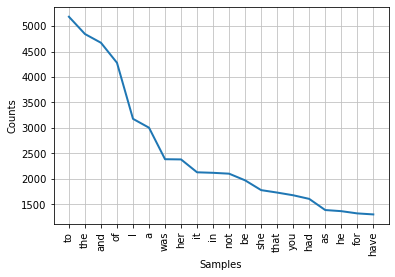

In [39]:
text.plot(20)

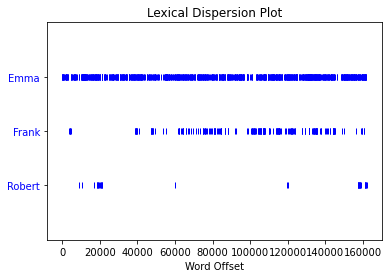

In [40]:
text.dispersion_plot(["Emma", "Frank", "Robert"])